# <center>Data Mining Project Code</center>

** **
## <center>*07 - Exploring Clustering Solutions*</center>

** **

After creating our clustering solutions, we decided to check how the customers where divided according to all variables in our dataset.

In this notebook, we start by importing all the data with the labels. After, we start exploring the variables according to the labels attribute to check if we can get any business insights.
** **


The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>

2. [Merging Perspectives](#2.-Merging-Perspectives) <br>

    2.1 [Hierarchical Clustering Optimisation](#2.1-Hierarchical-Clustering-Optimisation) <br><br>

3. [Cluster Analysis](#3.-Cluster-Analysis) <br><br>


# 1. Importing Libraries & Data

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import AgglomerativeClustering
import functions as f
import umap.umap_ as umap
import visualizations_by_cluster as v
import plotly.express as px


pd.set_option('display.max_columns', None)

In [62]:
data = pd.read_csv('./data/data.csv', 
                   index_col = "customer_id")

outliers = pd.read_csv('./data/outlier_data.csv', 
                   index_col = "customer_id")

Importing labeled data from each segmentation

In [63]:
temp_data = pd.read_csv('./data/labels/temp_data.csv',
                        index_col = 'customer_id' )
customer_data = pd.read_csv('./data/labels/customer_data_final.csv',
                        index_col = 'customer_id' )
spending_data = pd.read_csv('./data/labels/spending_data.csv',
                        index_col = 'customer_id' )
product_data = pd.read_csv('./data/labels/product_data_.csv',
                        index_col = 'customer_id' )
cuisine_data = pd.read_csv('./data/labels/cuisine_data.csv',
                        index_col = 'customer_id' )

Save the labels in the *data* Dataframe

In [64]:
data['temp_data_labels'] = temp_data['temp_data_labels']
data['customer_data_labels'] = customer_data['Cluster labels 4']
data['spending_data_labels'] = spending_data['spending_data_labels']
data['product_data_labels'] = product_data['product_data_labels']
data['cuisine_data_labels'] = cuisine_data['cusine_labels']

Saving the categorical features in a list and removing all ratio features

In [65]:
categ_cols = ['last_promo', 'payment_method']
categ_cols_enc = ['promo_DELIVERY', 'promo_DISCOUNT', 'promo_FREEBIE',
                  'promo_NO DISCOUNT', 'pay_CARD', 'pay_CASH',
                  'pay_DIGI', 'last_promo_enc', 'payment_method_enc',
                  'is_repeat_customer']

all_categ = categ_cols + categ_cols_enc

dow = ['DOW_' + str(i) + '_ratio' for i in range(7)]
hr = ['HR_' + str(i) + '_ratio' for i in range(1, 24)]

data.drop(dow, axis = 1, inplace = True)
# data.drop(dow2, axis = 1, inplace = True)
data.drop(hr, axis = 1, inplace = True)
# data.drop(hr2, axis = 1, inplace = True)

In [66]:
data

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                               
1b8f824d5e              2360            18             2              5   
5d272b9dcb              8670            17             2              2   
f6d1b2ba63              4660            38             1              2   
180c632ed8              4660            27             2              3   
4eb37a6705              4660            20             2              5   
...                      ...           ...           ...            ...   
f4e366c281              8670            30             1              1   
f6b6709018              8670            26             1              1   
f74ad8ce3f              8670            24             1              1   
f7b19c0241              8670            34             1              1   
fd40d3b0e0              4660            30             1              1   

             is_chain  first_order  last_order   last_promo payment_method  \
customer_id                                                                  
1b8f824d5e          1            0           1     DELIVERY           DIGI   
5d272b9dcb          2            0           1     DISCOUNT           DIGI   
f6d1b2ba63          2            0           1     DISCOUNT           CASH   
180c632ed8          1            0           2     DELIVERY           DIGI   
4eb37a6705          0            0           2  NO DISCOUNT           DIGI   
...               ...          ...         ...          ...            ...   
f4e366c281          1            0           0      FREEBIE           DIGI   
f6b6709018          0            0           0     DELIVERY           DIGI   
f74ad8ce3f          1            0           0  NO DISCOUNT           DIGI   
f7b19c0241          0            0           0     DISCOUNT           DIGI   
fd40d3b0e0          0            0           0  NO DISCOUNT           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0    

# 2. Merging Perspectives

<a href="#top">Top &#129033;</a>

**Contingency Table**

In [7]:
crosstab = pd.crosstab(
    [data['temp_data_labels'], data['customer_data_labels']],
    [data['spending_data_labels'], data['product_data_labels'], data['cuisine_data_labels']]
)

crosstab

spending_data_labels                    0                                     \
product_data_labels                     0                       1              
cuisine_data_labels                     0    1    2   3    4    0    1     2   
temp_data_labels customer_data_labels                                          
0                0                      3   11   12   2    2   50  138   202   
                 1                      2    3   17   0    1  196  178   557   
                 2                      0    2    3   1    0   57   31    50   
                 3                      8   60   71   5   18  171  577   876   
1                0                      7   95   93  15   52   19   74    86   
                 1                      6   55   93   2   17   75  127   212   
                 2                      1   13    8   4    9    4   11    15   
                 3                     29  454  439  44  223  111  319   475   
2                0                      2   18   24   1    6   42  162   213   
                 1                      0    6   34   0    0  272  198   607   
                 2                      1    2    3   0    1   72   34    81   
                 3                     12   98  126  12   33  193  717  1002   

spending_data_labels                                                1       \
product_data_labels                             3                   0        
cuisine_data_labels                     3    4  0   1   2  3  4     0    1   
temp_data_labels customer_data_labels                                        
0                0                      1   25  0   0   1  0  0    35    0   
                 1                      1   23  0   0   0  0  0    55    9   
                 2                      1   11  0   0   0  0  0   463    3   
                 3                     33  144  0   1   0  0  0    56    2   
1                0                      6   42  0   3   2  1  1   156    7   
                 1                      6   69  0   0   0  0  0   388  100   
                 2                      5    9  0   1   1  0  0  1803   24   
                 3                     39  143  1  18  12  0  2   264   23   
2                0                     11   45  0   0   0  0  0    35    1   
                 1                      3   35  0   0   0  0  0    91   14   
                 2                      2   10  0   0   0  0  0   333    4   
                 3                     29  221  0   1   2  0  0    45   10   

spending_data_labels                                                           \
product_data_labels                                   1                     3   
cuisine_data_labels                      2  3   4     0    1    2  3   4    0   
temp_data_labels customer_data_labels                                           
0                0                      10  0   0   200    7   30  0   0    1   
                 1                      39  0   0   706   60  341  0   4    0   
                 2                      29  0   0  1728   26  242  0   0   11   
                 3                      14  0   1   443   20   85  0   0    4   
1                0                      68  1   1   103   28   50  0   3   11   
                 1                     607  2  13   492  168  501  1  32   10   
                 2                     245  0   1   761   38  152  0   4  242   
                 3                     136  0   3   200   41  110  0   3   20   
2                0                       7  0   0   224   15   74  0   1    1   
                 1                      89  0   3   892   69  406  0   6    0   
                 2                      37  1   0  1477   28  219  0   3    8   
                 3                      17  0   0   487   23  108  0   3    1   

spending_data_labels                        2                                 \
product_data_labels                         0                    1             
cuisine_data_

In [8]:
num_clusters = (crosstab > 0).sum().sum()
num_clusters

330

Computing Cluster Centroids

In [9]:
data_centroids = (
    data.drop(columns=all_categ)  
    .groupby(['temp_data_labels', 
              'customer_data_labels', 
              'spending_data_labels', 
              'product_data_labels', 
              'cuisine_data_labels'])  
    .mean()  
)


data_centroids

customer_region  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                    
0                0                    0                    0                   0                        8670.000000   
                                                                               1                        8305.454545   
                                                                               2                        7279.166667   
                                                                               3                        8670.000000   
                                                                               4                        8670.000000   
...                                                                                                             ...   
2                3                    2                    0                   3                        8670.000000   
                                                                               4                        8670.000000   
                                                           3                   1                        6405.000000   
                                                                               3                        8670.000000   
                                                                               4                        8670.000000   

                                                                                                    customer_age  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                       41.000000   
                                                                               1                       39.727273   
                                                                               2                       39.500000   
                                                                               3                       39.500000   
                                                                               4                       40.000000   
...                                                                                                          ...   
2                3                    2                    0                   3                       24.000000   
                                                                               4                       24.000000   
                                                           3                   1                       25.000000   
                                                                               3                       30.000000   
                                                                               4                       32.000000   

                                                                                                    vendor_count  \
temp_data_labels customer_data_labels spending_data_labels product_data_labels cuisine_data_labels                 
0                0                    0                    0                   0                        4.000000   
                                                                               1                        4.090909   
                                                                               2                        3.750000   
                                                                               3                        3.500000   
                                                                               4                        4.500000   
...                                                                                                          ...   
2                3                    2                    0                   3                        7.500000   

## 2.1 Hierarchical Clustering Optimisation

<a href="#top">Top &#129033;</a>

Here we will use the same approach for optimising the parameters of Hierarchical Clustering as we did in the segmentation notebooks

In [10]:
linkages = ["complete", "average", "single", "ward"]

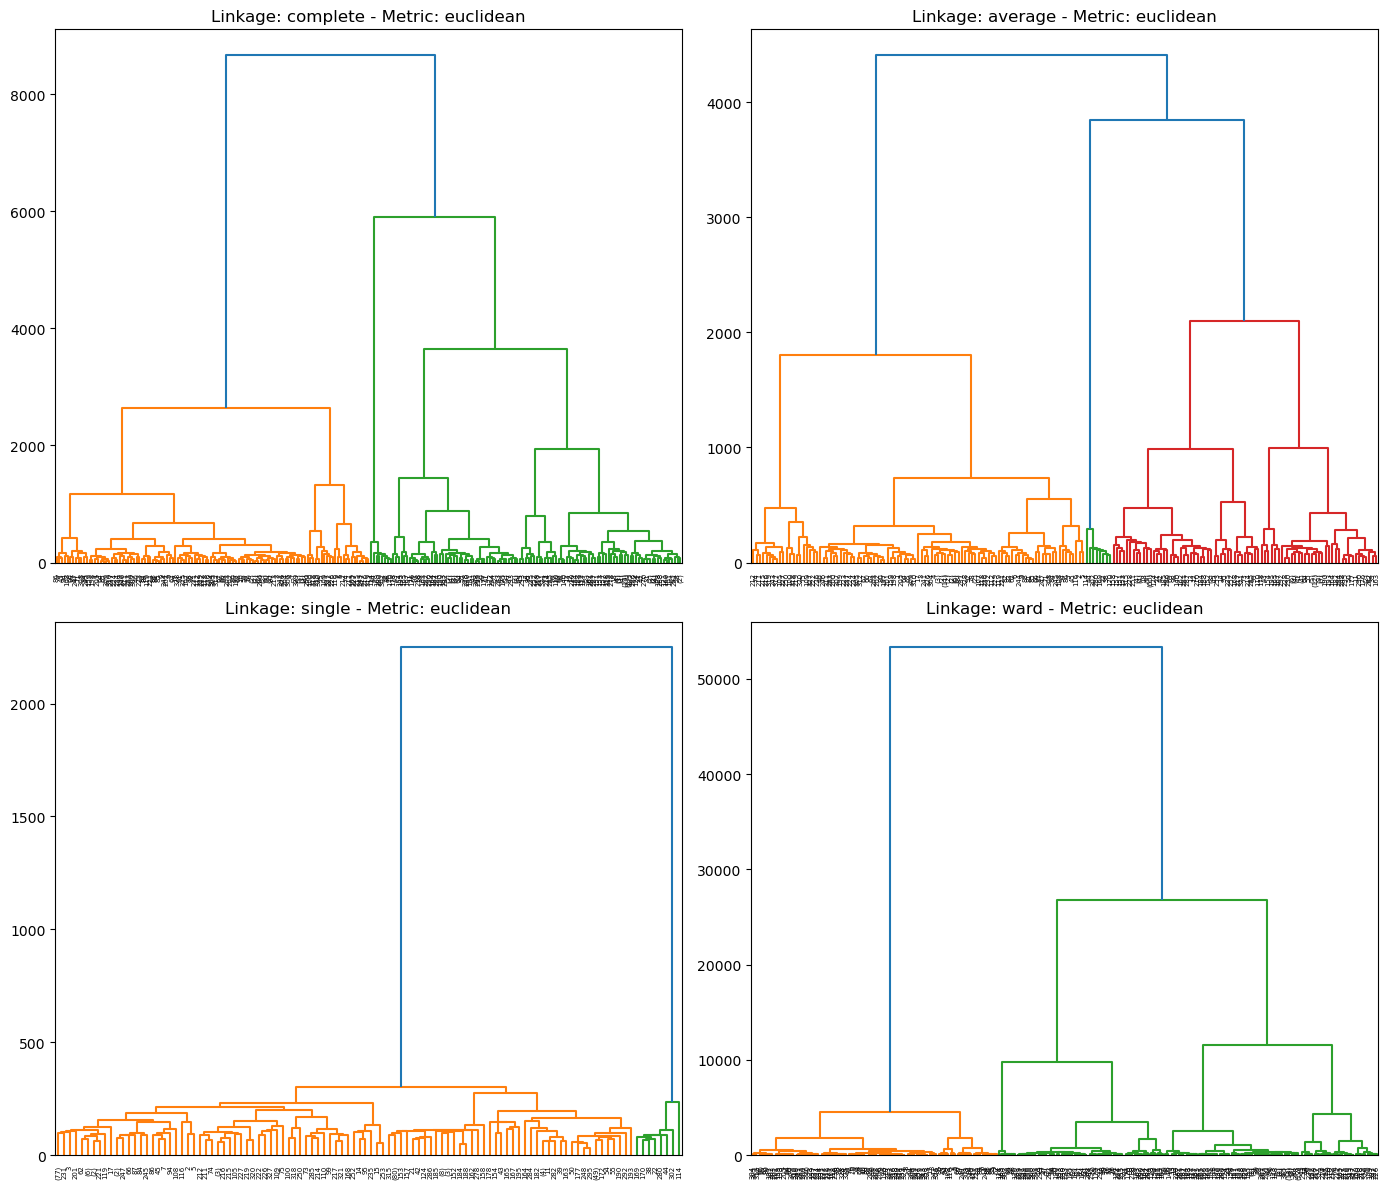

In [11]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages, 
                                metrics=['euclidean'])

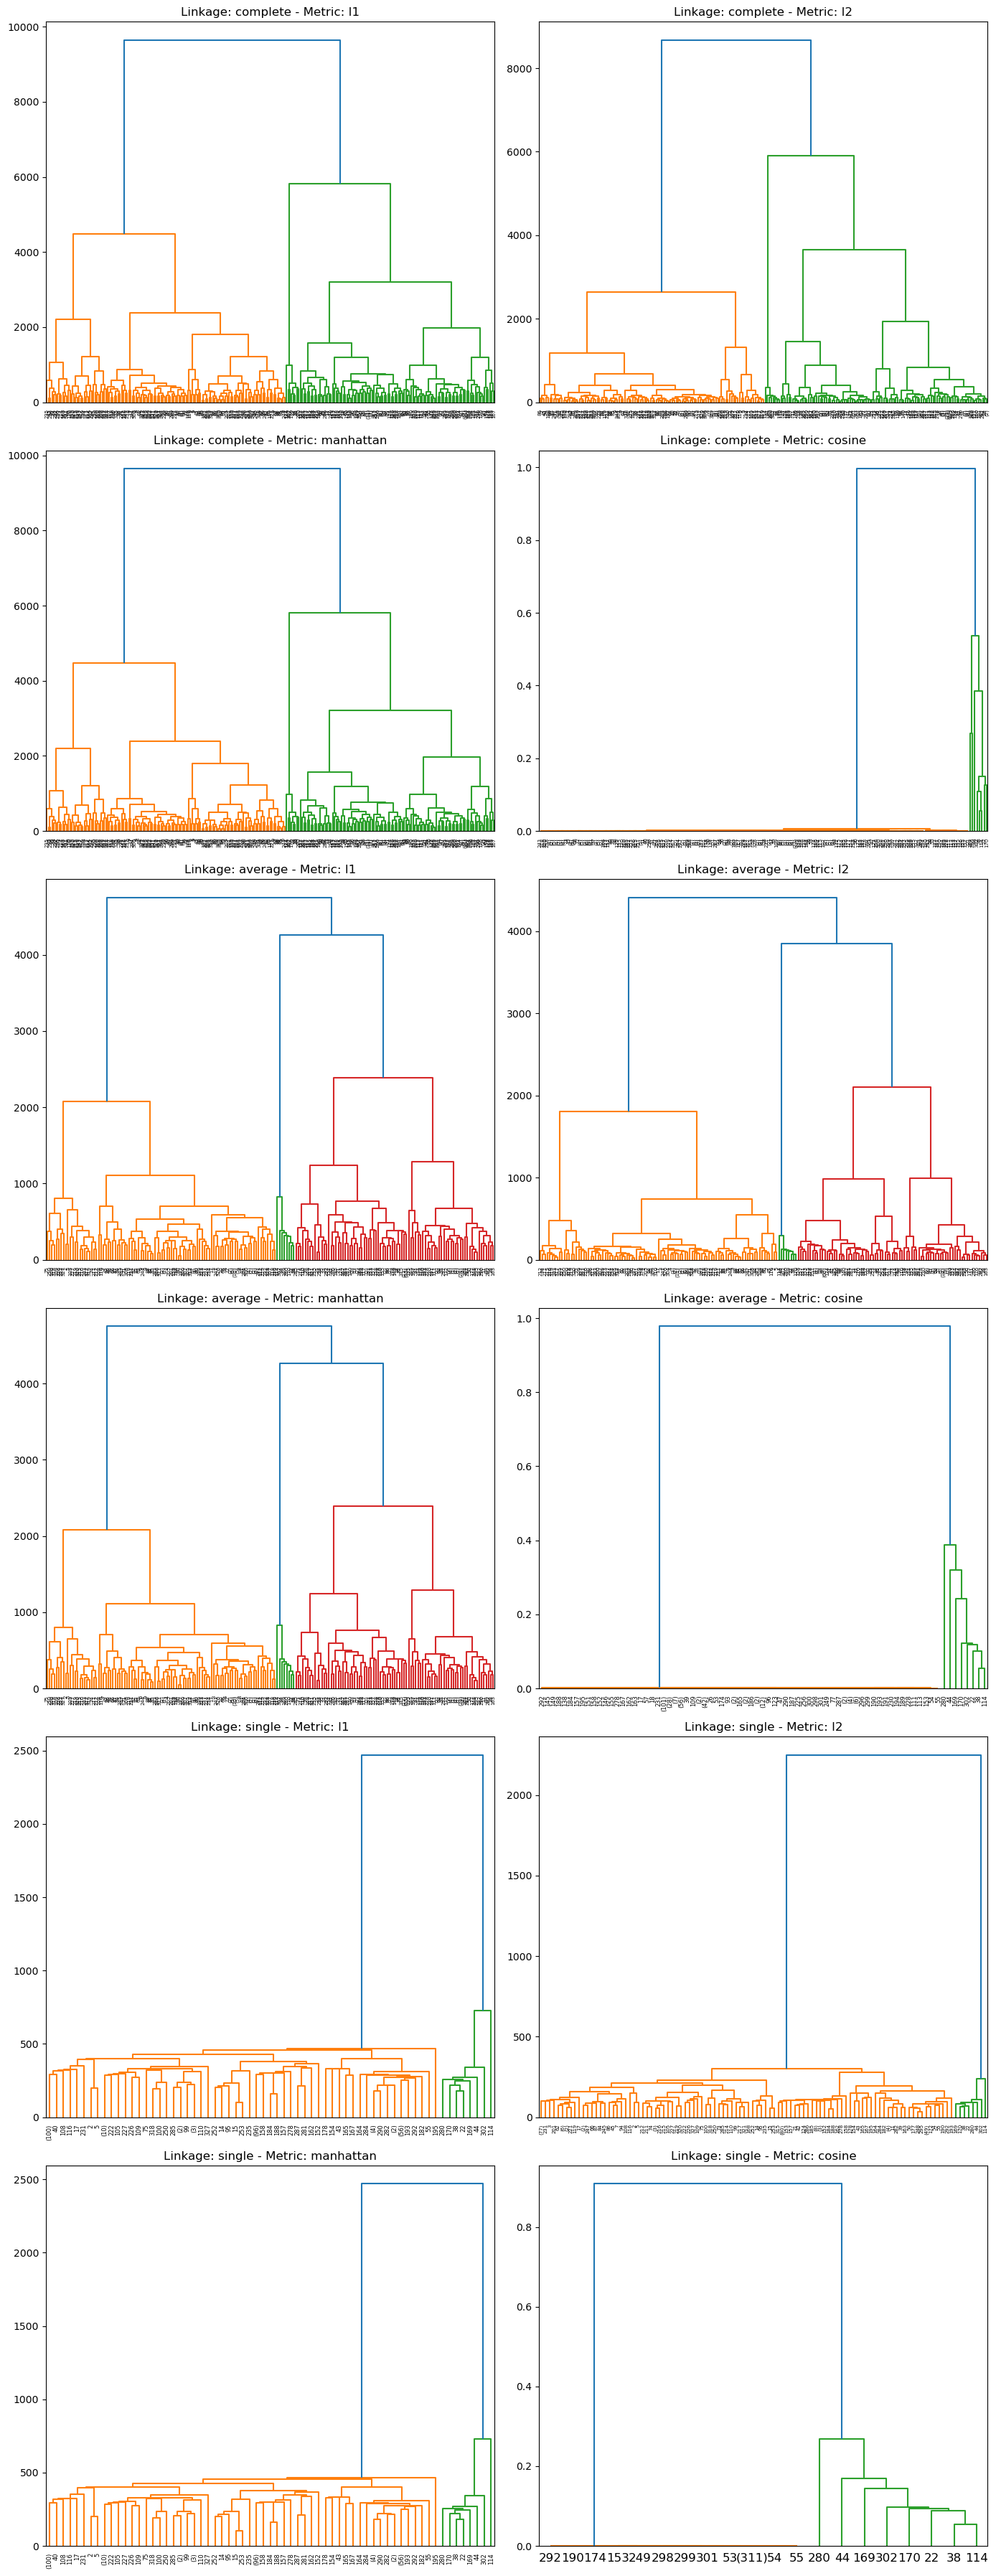

In [12]:
f.plot_hierarchical_dendrograms(data_centroids, 
                                path=None, 
                                linkages=linkages[:3], 
                                metrics=['l1', 'l2', 'manhattan',
                                         'cosine'])

In [13]:
results = []

# Define clustering settings
cluster_settings = [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'ward', "metric": 'euclidean'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'manhattan'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'complete', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l1'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'l2'}
    for k in range(2, 11)
] + [
    {"model_type": "hierarchical", "n_clusters": k, "linkage": 'average', "metric": 'manhattan'}
    for k in range(2, 11)
]

# Loop over settings and evaluate models
for settings in cluster_settings:
    result = f.create_and_evaluate_model(df=data_centroids, feats=data_centroids.columns.tolist(), **settings)
    results.append(result)

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)
final_results_df

Model  n_clusters  linkage     metric        R2  Silhouette  \
0   hierarchical           2  average  euclidean  0.785740    0.717849   
1   hierarchical           3  average  euclidean  0.844462    0.670518   
2   hierarchical           4  average  euclidean  0.949862    0.776891   
3   hierarchical           5  average  euclidean  0.977987    0.758144   
4   hierarchical           6  average  euclidean  0.980784    0.689684   
..           ...         ...      ...        ...       ...         ...   
85  hierarchical           6  average  manhattan  0.981791    0.695060   
86  hierarchical           7  average  manhattan  0.987955    0.717259   
87  hierarchical           8  average  manhattan  0.991639    0.664814   
88  hierarchical           9  average  manhattan  0.991676    0.655195   
89  hierarchical          10  average  manhattan  0.992478    0.649960   

    Calinski-Harabasz  
0         1202.850983  
1          887.690371  
2         2058.702249  
3         3609.808450  
4         3307.379065  
..                ...  
85        3493.880753  
86        4415.627575  
87        5455.581329  
88        4780.128847  
89        4691.052567  

[90 rows x 7 columns]

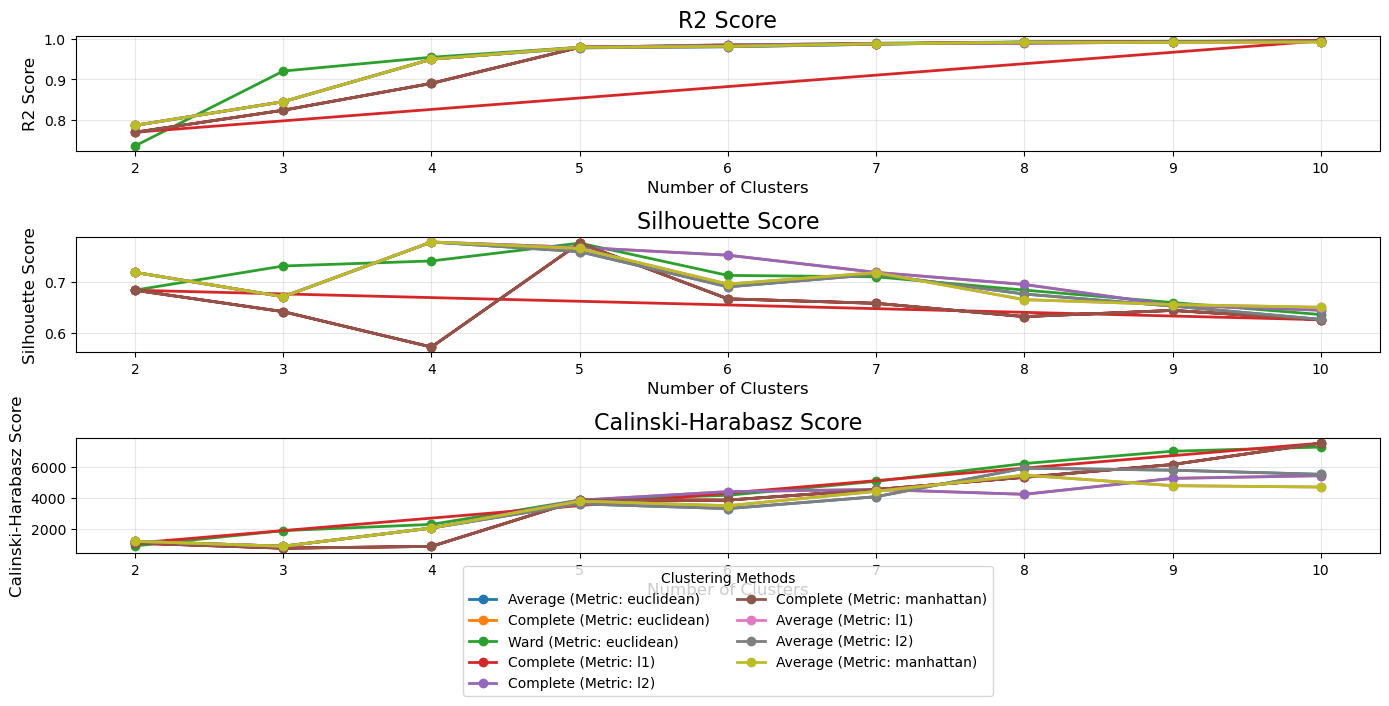

In [14]:
f.plot_evaluation_scores(final_results_df)

**Final Cluster Decision**

In [67]:
linkage = 'ward'

hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean',
    n_clusters= 3
)

hclust_labels = hclust.fit_predict(data_centroids)
data_centroids['hclust_labels'] = hclust_labels

In [68]:
cluster_mapper = data_centroids['hclust_labels'].to_dict()

**Final Merged Labels**

In [69]:
df = data.copy()

df['merged_labels'] = df.apply(
    lambda row: cluster_mapper[
        (
            row['temp_data_labels'], 
            row['customer_data_labels'], 
            row['spending_data_labels'], 
            row['product_data_labels'], 
            row['cuisine_data_labels']
        )
    ], axis=1
)

df

customer_region  customer_age  vendor_count  product_count  \
customer_id                                                               
1b8f824d5e              2360            18             2              5   
5d272b9dcb              8670            17             2              2   
f6d1b2ba63              4660            38             1              2   
180c632ed8              4660            27             2              3   
4eb37a6705              4660            20             2              5   
...                      ...           ...           ...            ...   
f4e366c281              8670            30             1              1   
f6b6709018              8670            26             1              1   
f74ad8ce3f              8670            24             1              1   
f7b19c0241              8670            34             1              1   
fd40d3b0e0              4660            30             1              1   

             is_chain  first_order  last_order   last_promo payment_method  \
customer_id                                                                  
1b8f824d5e          1            0           1     DELIVERY           DIGI   
5d272b9dcb          2            0           1     DISCOUNT           DIGI   
f6d1b2ba63          2            0           1     DISCOUNT           CASH   
180c632ed8          1            0           2     DELIVERY           DIGI   
4eb37a6705          0            0           2  NO DISCOUNT           DIGI   
...               ...          ...         ...          ...            ...   
f4e366c281          1            0           0      FREEBIE           DIGI   
f6b6709018          0            0           0     DELIVERY           DIGI   
f74ad8ce3f          1            0           0  NO DISCOUNT           DIGI   
f7b19c0241          0            0           0     DISCOUNT           DIGI   
fd40d3b0e0          0            0           0  NO DISCOUNT           CASH   

             CUI_American  CUI_Asian  CUI_Beverages  CUI_Cafe  \
customer_id                                                     
1b8f824d5e           0.00       0.00           0.00       0.0   
5d272b9dcb          12.82       6.39           0.00       0.0   
f6d1b2ba63           9.20       0.00           0.00       0.0   
180c632ed8           0.00      13.70           0.00       0.0   
4eb37a6705          14.57      40.87           0.00       0.0   
...                   ...        ...            ...       ...   
f4e366c281           0.00       0.00          18.04       0.0   
f6b6709018          18.04       0.00           0.00       0.0   
f74ad8ce3f           0.00       0.00           0.00       0.0   
f7b19c0241           0.00      12.03           0.00       0.0   
fd40d3b0e0           0.00       0.00           0.00       0.0   

             CUI_Chicken Dishes  CUI_Chinese  CUI_Desserts  CUI_Healthy  \
customer_id                                                               
1b8f824d5e                  0.0          0.0          0.00          0.0   
5d272b9dcb                  0.0          0.0          0.00          0.0   
f6d1b2ba63                  0.0          0.0          0.00          0.0   
180c632ed8                  0.0          0.0          0.00          0.0   
4eb37a6705                  0.0          0.0          0.00          0.0   
...                         ...          ...           ...          ...   
f4e366c281                  0.0          0.0          0.00          0.0   
f6b6709018                  0.0          0.0          0.00          0.0   
f74ad8ce3f                  0.0          0.0         17.79          0.0   
f7b19c0241                  0.0          0.0          0.00          0.0   
fd40d3b0e0                  0.0          0.0          0.00          0.0   

             CUI_Indian  CUI_Italian  CUI_Japanese  CUI_Noodle Dishes  \
customer_id                                                             
1b8f824d5e        28.88         0.00           0.0    

Distribution of customers across each cluster

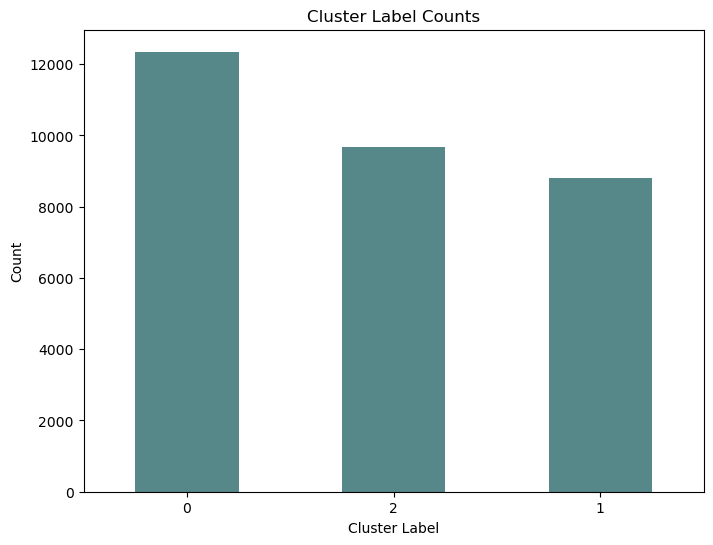

In [18]:
f.plot_counts(df['merged_labels'])

In [19]:
# cluster size
df.groupby('merged_labels')\
    .size()\
    .to_frame()


0
merged_labels       
0              12351
1               8815
2               9684

# 3. Cluster Analysis

<a href="#top">Top &#129033;</a>

Assigning df back to data

In [36]:
data = df.copy()

Displaying the mean of each feature per cluster

In [37]:
pd.set_option('display.max_rows', None)
data.groupby('merged_labels').mean(numeric_only=True).T

merged_labels                              0             1             2
customer_region                  4858.470569   8291.162791   2440.523544
customer_age                       27.456076     27.691322     27.429884
vendor_count                        2.664238      2.864095      3.669868
product_count                       4.736782      4.813386      6.172140
is_chain                            2.105740      1.738627      4.149525
first_order                        29.998057     31.005786     24.855432
last_order                         64.229374     62.452411     63.197646
CUI_American                        5.840479      5.525905      2.113578
CUI_Asian                           5.264717     23.208508      2.060618
CUI_Beverages                       0.540644      4.264616      2.014393
CUI_Cafe                            1.178785      0.032200      0.244764
CUI_Chicken Dishes                  0.284426      0.005231      1.906813
CUI_Chinese                         0.607183      1.168719      2.190434
CUI_Desserts                        0.208513      2.083205      0.435077
CUI_Healthy                         1.003030      0.945689      0.420402
CUI_Indian                          2.315106      0.184066      1.605598
CUI_Italian                         6.299038      0.339062      0.936575
CUI_Japanese                        3.130946      3.646886      1.622346
CUI_Noodle Dishes                   0.146322      0.003865      1.799476
CUI_OTHER                           3.737895      0.275213      3.767157
CUI_Street Food / Snacks            0.847220     11.108023      0.500583
CUI_Thai                            1.355234      0.022793      0.715650
DOW_0                               0.456562      0.471015      0.622367
DOW_1                               0.477046      0.466818      0.632487
DOW_2                               0.504575      0.477368      0.658199
DOW_3                               0.556635      0.475326      0.679265
DOW_4                               0.660270      0.478162      0.734614
DOW_5                               0.599142      0.519569      0.732239
DOW_6                               0.634200      0.532955      0.810615
HR_1                                0.017569      0.113103      0.036658
HR_2                                0.020079      0.147703      0.024783
HR_3                                0.038296      0.323539      0.018794
HR_4                                0.032305      0.280658      0.010946
HR_5                                0.027204      0.221441      0.011565
HR_6                                0.036515      0.164265      0.012288
HR_7                                0.047041      0.138854      0.034903
HR_8                                0.095215      0.167555      0.090768
HR_9                                0.214558      0.284742      0.139818
HR_10                               0.314145      0.361202      0.223978
HR_11                               0.265970      0.296313      0.508468
HR_12                               0.198850      0.197618      0.506712
HR_13                               0.174399      0.150312      0.344486
HR_14                               0.213748      0.131707      0.247109
HR_15                               0.383289      0.107431      0.228005
HR_16                               0.567808      0.080885      0.263321
HR_17                               0.542709      0.050028      0.433395
HR_18                               0.344426      0.029155      0.552251
HR_19                               0.173832      0.013159      0.503717
HR_20                               0.074002      0.010777      0.324866
HR_21                               0.040240      0.008168      0.157373
HR_22                               0.028095      0.022348      0.086225
HR_23                               0.020484      0.046625      0.065469
promo_DELIVERY                      0.180876      0.215882      0.205184
promo_DISCOUNT                      0.143389      0.122405

In [38]:
pd.reset_option('display.max_rows', None)

In [39]:
# v.plot_grouped_bar_chart(data, 'product_count',
#                          'last_promo', 
#                          data['merged_labels'])

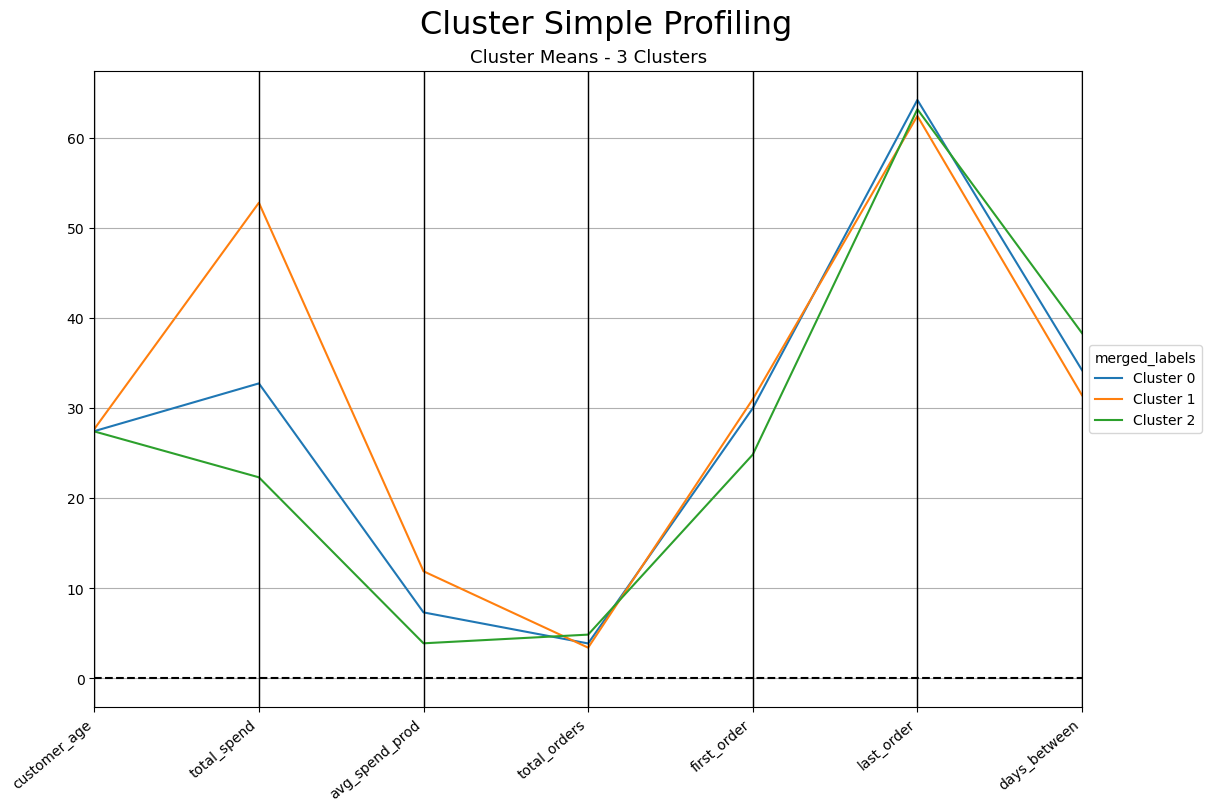

In [40]:
label_cols = ['merged_labels']

f.cluster_profiles(
    df=data[['customer_age', 'total_spend', 'avg_spend_prod', 'total_orders', 'first_order', 'last_order',
             'days_between'] + label_cols], 
    label_columns = label_cols,
    figsize=(12, 8), 
    cmap="tab10",
    compare_titles=None
)


In [41]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'CUI_Italian')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [42]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'CUI_American')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [43]:
v.plot_boxplot_by_cluster(data, 'merged_labels', 'avg_spend_prod')

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
hour_columns = [f'HR_{i}' for i in range(1, 24)]

# Compute mean values grouped by labels
df_hour = data[hour_columns + ['merged_labels']].groupby('merged_labels').mean()

# Convert cluster labels to strings for proper display
df_hour.index = df_hour.index.astype(str)

# Create heatmap
fig = px.imshow(
    df_hour, 
    labels={'x': 'Hour', 'y': 'Cluster', 'color': 'Average Orders'},
    x=hour_columns, 
    y=df_hour.index, 
    color_continuous_scale='Cividis',
    title='Cluster Distribution Across Hours of the Day'
)

fig.show()


In [22]:
v.plot_avg_hr_by_label(data, 'merged_labels')

**UMAP visualisation**

/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


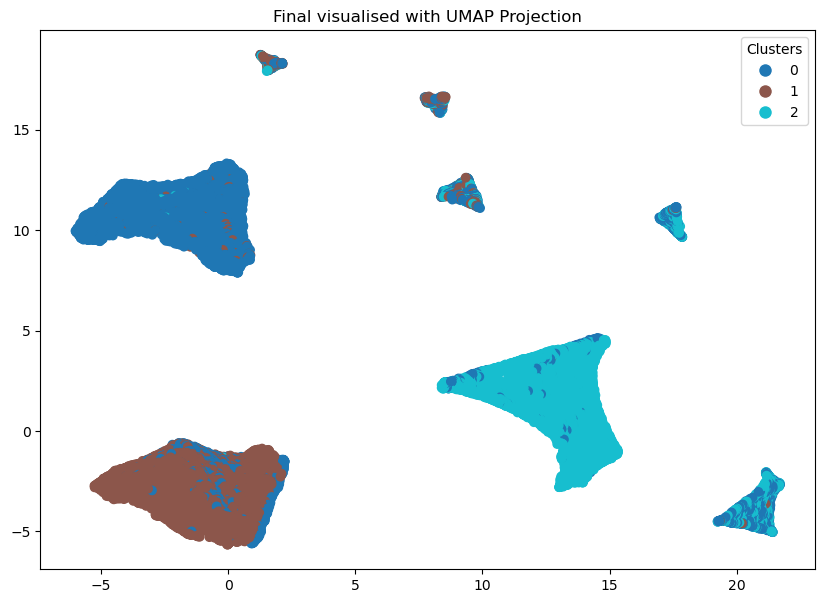

In [28]:
labels = data['merged_labels']

umap_object = umap.UMAP(n_neighbors = 50)
umap_embedding = umap_object.fit_transform(data.drop(all_categ, axis = 1))

f.plot_dim_reduction(umap_embedding, targets = labels,
                   technique = 'Final visualised with UMAP')